# Example of learned soft object manipulation

License: Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International. Applied to sections that are not already under other licenses as specified.

## Adding libraries

In [1]:
import os, sys, errno, argparse
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model
np.set_printoptions(precision=3, edgeitems=10, linewidth=100, formatter={'float': '{: 0.5f}'.format})
from IPython.display import display
from xvfbwrapper import Xvfb
from mjk_env import MJK
from pbl_env import PBL

pybullet build time: May 20 2022 19:44:17


## The class that does heavy lifting

In [2]:
class SAC(object):
    max_steps = 30
    #change this however many times you want to see the thing do the thing
    total_test_episodes = 3
    skip_frame = 120

    def __init__(self, env):
        self.env_name = env
        if env == 'pbl':
            self.sim = PBL()
        elif env == 'mjk':
            self.sim = MJK()
        #self.input_shape = (120, 120, 3)
        #self.framerate = 60  # (Hz)
        #self.dur = self.max_steps / self.framerate
        #self.output_shape = self.sim.output_shape
        return

    def close(self):
        self.sim.close()
        self.sim = None
        return

    def rerun(self):
        actor = load_model(os.getcwd()+'/actor_model_'+self.env_name+'_sac.h5')
        for j in range(self.total_test_episodes):
            ogdist, images, images2 = self.sim.test_setup()
            for i in range(self.max_steps):
                state = self.sim.state()
                actions = actor.predict(np.array([state]), verbose=0)
                actions = np.squeeze(actions)
                self.sim.play(actions)
        return

## The part that was the main. Starting things

In [3]:
#algo = 'pybullet'
algo = 'mujoco'
physeng = None
if   algo in ['pbl','1','pybullet','PyBullet']:
    physeng = 'pbl'
elif algo in ['mjk','2','mujoco','MuJoCo']:
    physeng = 'mjk'
else:
    print('Wrong argument to start with: ', args.algo)
    
vdisplay = Xvfb()
vdisplay.start()
#os.environ['MUJOCO_GL']='egl'#'osmesa'

sac = SAC(physeng)
print('Start time:  '+ datetime.now().strftime('%Y-%m-%d _ %H:%M:%S'))

Start time:  2024-08-21 _ 15:07:08


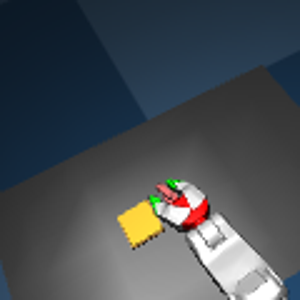

In [4]:
sac.rerun()

In [5]:
algo = 'pybullet'
#algo = 'mujoco'
physeng = None
if   algo in ['pbl','1','pybullet','PyBullet']:
    physeng = 'pbl'
elif algo in ['mjk','2','mujoco','MuJoCo']:
    physeng = 'mjk'
else:
    print('Wrong argument to start with: ', args.algo)
sac = SAC(physeng)
print('Start time:  '+ datetime.now().strftime('%Y-%m-%d _ %H:%M:%S'))

Start time:  2024-08-21 _ 15:08:19


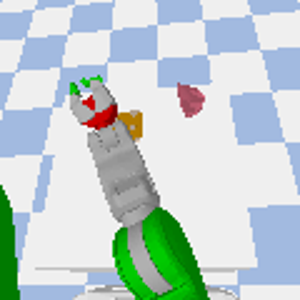

In [6]:
sac.rerun()
sac.close()

## Close and wrap up

In [7]:
vdisplay.stop()
print('Finish time:  '+ datetime.now().strftime('%Y-%m-%d _ %H:%M:%S'))

Finish time:  2024-08-21 _ 15:09:40
